In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Rule 54 fit Peak & steady-state
Asites=1-4, Bsites=100, steps=500, MeasStag 1-4

Asites=1, Bsites=100, steps=1500, MeasStag 21

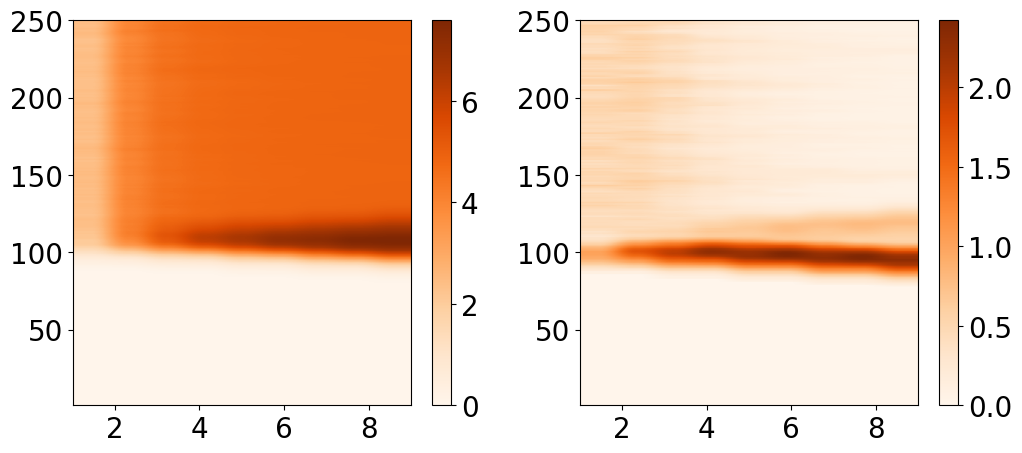

In [5]:
file_name = "../data/240226/240226_4"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

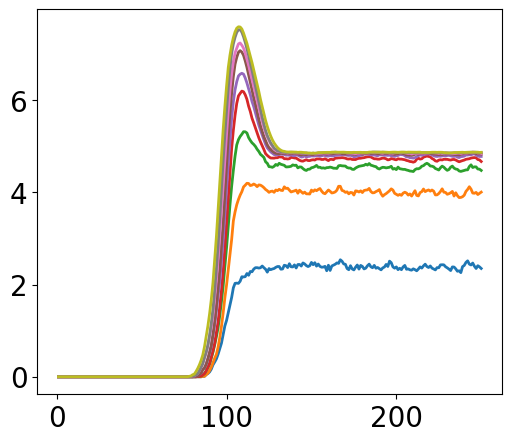

In [9]:
plt.figure(figsize=(6,5))
cmap = mpl.colormaps['autumn']
for i in range(0,len(nmeas_l),1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,200])
    # plt.xscale('log')

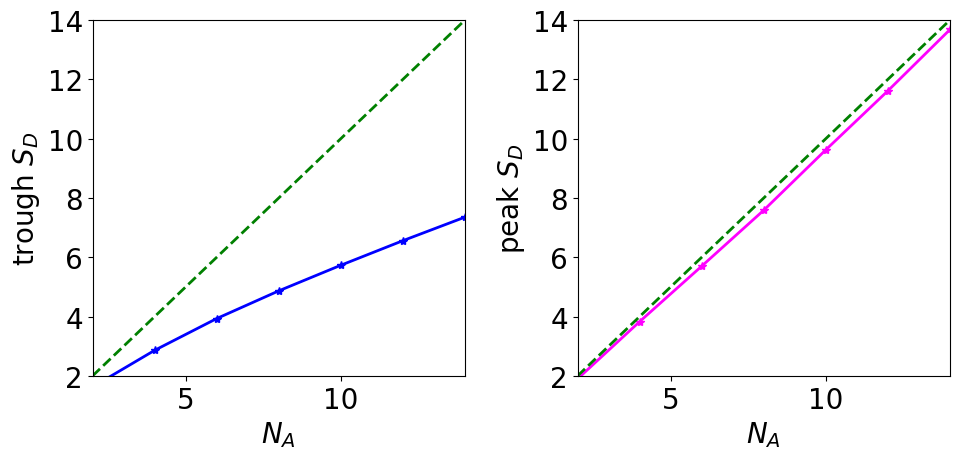

In [46]:
nAsite_l = np.array([1,2,3,4,5,6,7])
Smin_l = np.zeros(len(nAsite_l))
Smax_l = np.zeros(len(nAsite_l))

for i in range(1,5):
    file_name = "../data/240226/240226_%d"%(i)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
    
    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
    S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))
    Smin_l[i-1] = np.average(S_ave_arr[-1,-10:])
    Smax_l[i-1] = np.max(S_ave_arr[-1,:])

for i in range(5,8):
    file_name = "../data/240226/240226_n%d_pp.npz"%(i)
    raw = np.load(file_name)
    S_ave_arr = raw['data_ave_l']
    Smin_l[i-1] = np.average(S_ave_arr[-1,-10:])
    Smax_l[i-1] = np.max(S_ave_arr[-1,:])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(2*nAsite_l,Smin_l,"*-",c='blue')
plt.plot(2*nAsite_l,2*np.array(nAsite_l),"g--")
plt.xlim([2,14])
plt.ylim([2,14])
plt.xlabel("$N_A$")
plt.ylabel("trough $S_D$")
plt.subplot(1,2,2)
plt.plot(2*nAsite_l,Smax_l,"*-",c='magenta')
plt.plot(2*nAsite_l,2*np.array(nAsite_l),"g--")
plt.xlim([2,14])
plt.ylim([2,14])
plt.xlabel("$N_A$")
plt.ylabel("peak $S_D$")
plt.tight_layout()

In [20]:
Smin_l[0]

1.628809018720793

rule 54 for pulication

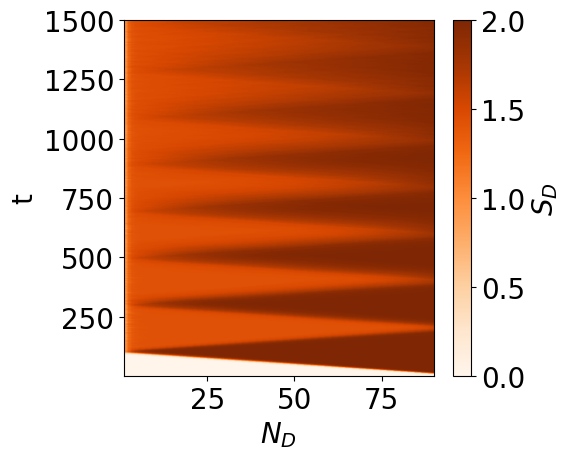

In [48]:
file_name = "../data/240226/240226_21"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
cbar = plt.colorbar()
cbar.ax.set_ylabel("$S_D$")
plt.xlabel("$N_D$")
plt.ylabel("t")
plt.tight_layout()

Text(0, 0.5, '$S_D$')

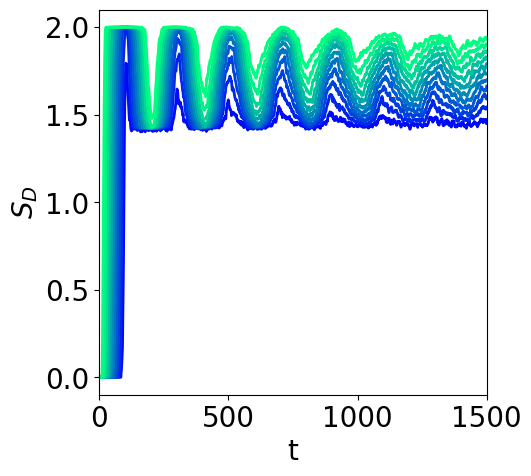

In [52]:
plt.figure(figsize=(5,5))
cmap = mpl.colormaps['winter']
for i in range(4,90,8):
    plt.plot(nstep_l,S_ave_arr[i,:],c=cmap(i/80))
plt.xlim([0,1500])
plt.xlabel("t")
plt.ylabel("$S_D$")

Text(0, 0.5, '$S_D$')

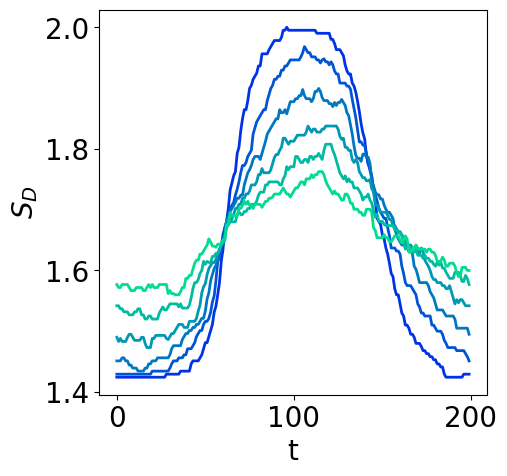

In [41]:
trough = 1.628809018720793
plt.figure(figsize=(5,5))
cmap = mpl.colormaps['winter']
for step in [300,500,700,900,1100,1300]:
    plt.plot(S_ave_arr[40,step-100:step+100],c=cmap(step/1500))
center = 700
# plt.xlim([center-60,center+60])
plt.xlabel("t")
plt.ylabel("$S_D$")

#### Rule 30 MIPT
Asites=1, Bsites=80:20:280, 11-20

Asites=1:6, Bsites=100, 13,21-25


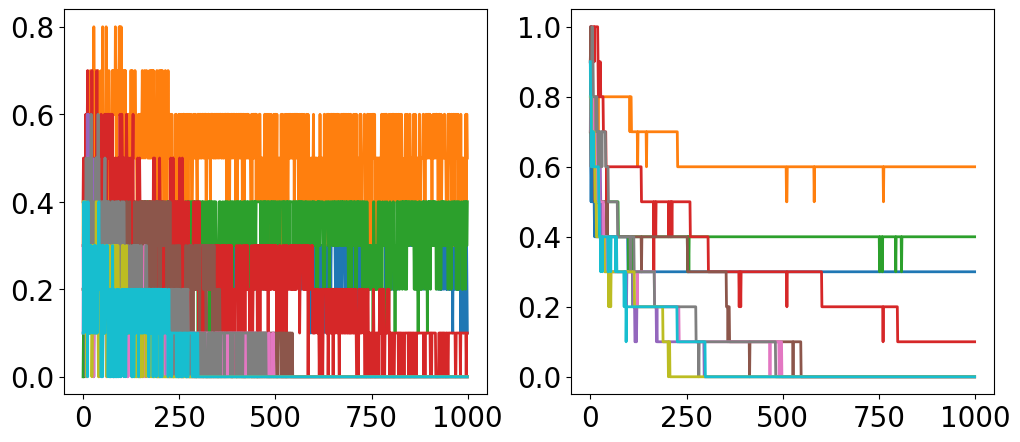

In [37]:
file_idx = 11
file_name = "../data/240226n/240226_n%d_pp.npz"%(file_idx)
raw = np.load(file_name)
nmeas_l = raw['y_l']
nsteps_l = np.arange(1000)
pertb_l = raw['z_l']
S_ave_arr = raw['data_ave_l']
S_std_arr = raw['data_std_l']


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(40,50,1):
    plt.plot(nsteps_l, S_ave_arr[pertb_idx,10,:])
plt.subplot(1,2,2)
for pertb_idx in range(40,50,1):
    plt.plot(nsteps_l, S_ave_arr[pertb_idx,-1,:])

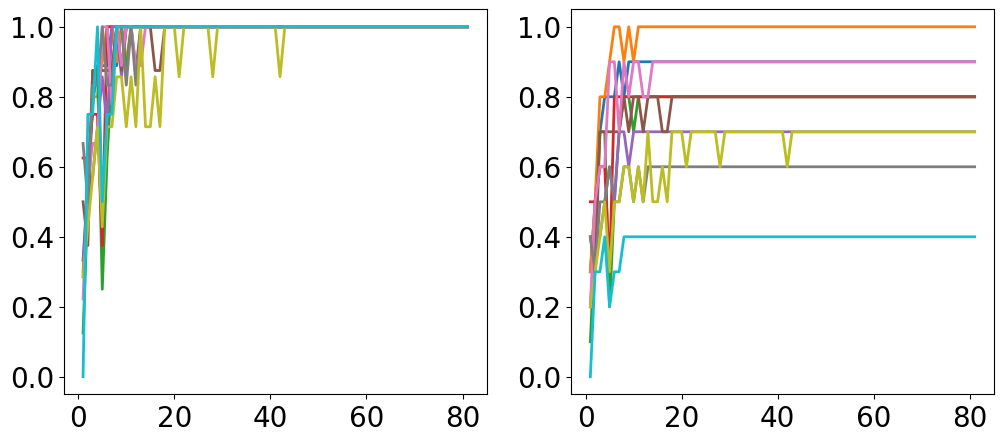

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(30,40,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1] / S_ave_arr[pertb_idx,-1,-1])
plt.subplot(1,2,2)
for pertb_idx in range(30,40,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1])

# plt.xlim([0,25])

#### Rule 30 OTOC
nAsites=1,nBsites=100,

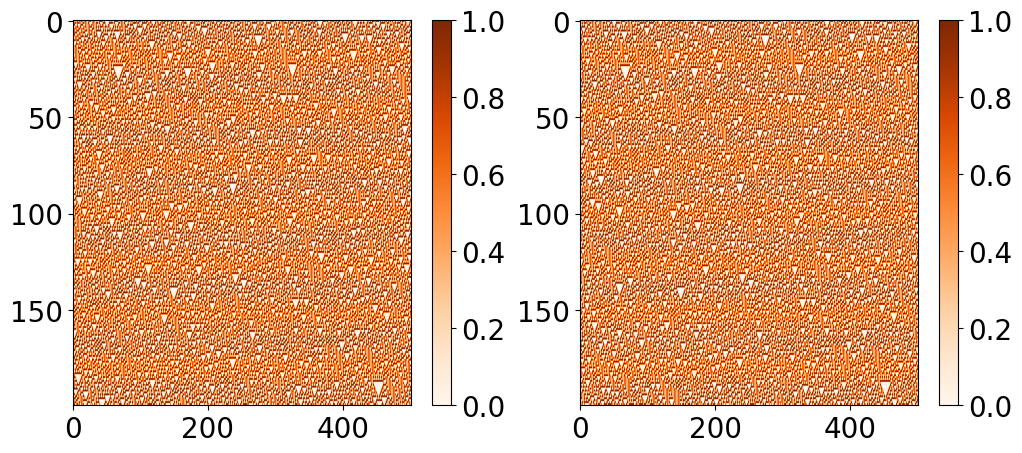

In [162]:
file_name = "../data/240226/rule30_OTOC6"
sites_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
traj0 = raw[:,0].reshape((len(nstep_l),len(sites_l)))
traj1 = raw[:,1].reshape((len(nstep_l),len(sites_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(traj0,aspect="auto",cmap="Oranges")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(traj1,aspect="auto",cmap="Oranges")
plt.colorbar()

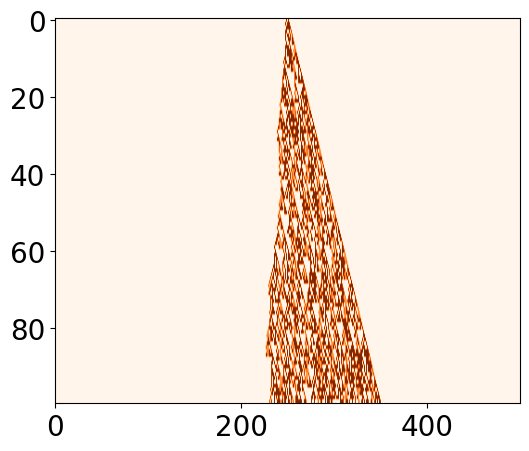

In [163]:
OTOC = (traj0.astype(bool) ^ traj1.astype(bool))
OTOC = OTOC.astype(int)
plt.figure(figsize=(6,5))
plt.imshow(np.roll(OTOC[0:100,:],250,1),aspect="auto",cmap="Oranges")

In [142]:
OTOC.shape

(500, 101)